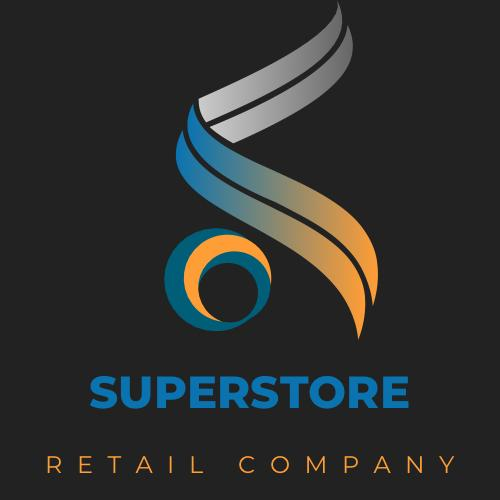

# Superstore Analysis

#### A multinational retail company is embarking on a campaign called Operation  Increase Sales and Profit' (OISP) which focuses on increasing the sales of the company and maximising profit. As the company’s in-house data analyst team we are tasked with analyzing a four year daily sales records data  to find meaningful insights to help the management team take any actionable decisions with regards to the campaign.

#### Importing the required libraries for analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Loading the data into  the kernel

In [5]:
data = pd.read_csv("superstore.csv", sep = ",", encoding = "latin-1")

#### Making a copy of the data

In [6]:
superstore_copy = data.copy()
superstore_copy

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


#### Checking the shape of the dataset

In [7]:
data.shape

(51290, 24)

#### Checking the size of the dataset

In [8]:
data.size

1230960

#### Checking for columns headers

In [9]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

#### Checking for null values in the dataset

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

#### Checking for the duplicates in the dataset

In [11]:
data[data.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority


#### Suming the number of duplicates in the dataset

In [12]:
data.duplicated().sum()

0

#### Checking for data types  of all columns

In [13]:
data.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

#### Changing the data types of columns to aid in analysis

In [14]:
data["Ship Mode"] = data["Ship Mode"].astype("category")
data["Country"] = data["Country"].astype("category")
data["Market"] = data["Market"].astype("category")
data["Region"] = data["Region"].astype("category")
data["Category"] = data["Category"].astype("category")
data["Segment"] = data["Segment"].astype("category")
data["Sub-Category"] = data["Sub-Category"].astype("category")
data["Order Priority"] = data["Order Priority"].astype("category")

#### Checking the data types again

In [15]:
data.dtypes

Row ID               int64
Order ID            object
Order Date          object
Ship Date           object
Ship Mode         category
Customer ID         object
Customer Name       object
Segment           category
City                object
State               object
Country           category
Postal Code        float64
Market            category
Region            category
Product ID          object
Category          category
Sub-Category      category
Product Name        object
Sales              float64
Quantity             int64
Discount           float64
Profit             float64
Shipping Cost      float64
Order Priority    category
dtype: object

#### Checking for summary statistics of the data

In [16]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


#### Generating summary statistics for both categorical and integer columns.

In [17]:
data.describe(include = "category")

,Ship Mode,Segment,Country,Market,Region,Category,Sub-Category,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290
unique,4,3,147,7,13,3,17,4
top,Standard Class,Consumer,United States,APAC,Central,Office Supplies,Binders,Medium
freq,30775,26518,9994,11002,11117,31273,6152,29433


#### Checking for null values in the data

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Row ID          51290 non-null  int64   
 1   Order ID        51290 non-null  object  
 2   Order Date      51290 non-null  object  
 3   Ship Date       51290 non-null  object  
 4   Ship Mode       51290 non-null  category
 5   Customer ID     51290 non-null  object  
 6   Customer Name   51290 non-null  object  
 7   Segment         51290 non-null  category
 8   City            51290 non-null  object  
 9   State           51290 non-null  object  
 10  Country         51290 non-null  category
 11  Postal Code     9994 non-null   float64 
 12  Market          51290 non-null  category
 13  Region          51290 non-null  category
 14  Product ID      51290 non-null  object  
 15  Category        51290 non-null  category
 16  Sub-Category    51290 non-null  category
 17  Product Name

#### Checking the first 20 rows of the data

In [19]:
data.head(20)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.00,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.10,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.00,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.50,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.10,37.7700,4.70,Medium
5,22254,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-PA-10001968,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.10,15.3420,1.80,Medium
6,21613,IN-2011-30733,1/2/2011,3/2/2011,Second Class,PO-18865,Patrick O'Donnell,Consumer,Dhaka,Dhaka,...,TEC-CO-10002316,Technology,Copiers,"Brother Personal Copier, Laser",285.780,2,0.00,71.4000,57.30,Critical
7,34662,CA-2011-115161,1/2/2011,3/2/2011,First Class,LC-17050,Liz Carlisle,Consumer,Mission Viejo,California,...,FUR-BO-10003966,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",290.666,2,0.15,3.4196,54.64,High
8,44508,AO-2011-1390,1/2/2011,4/2/2011,Second Class,DK-3150,David Kendrick,Corporate,Luanda,Luanda,...,OFF-FEL-10001541,Office Supplies,Storage,"Fellowes Lockers, Wire Frame",206.400,1,0.00,92.8800,53.08,Critical
9,23688,ID-2011-56493,1/2/2011,3/2/2011,Second Class,SP-20650,Stephanie Phelps,Corporate,Yingcheng,Hubei,...,OFF-ST-10002161,Office Supplies,Storage,"Tenex Trays, Single Width",162.720,3,0.00,68.3100,44.36,Critical


#### Checking the last 20 rows of the data

In [20]:
data.tail(20)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51270,27701,IN-2014-23754,31-12-2014,7/1/2015,Standard Class,KM-16225,Kalyca Meade,Corporate,Shantou,Guangdong,...,OFF-EN-10002630,Office Supplies,Envelopes,"Ames Business Envelopes, Recycled",67.200,5,0.00,24.7500,4.06,Medium
51271,23682,IN-2014-75603,31-12-2014,5/1/2015,Second Class,BS-11365,Bill Shonely,Corporate,Vijayawada,Andhra Pradesh,...,OFF-ST-10001824,Office Supplies,Storage,"Rogers Box, Single Width",72.000,3,0.00,4.3200,3.88,Medium
51272,16563,IT-2014-3715679,31-12-2014,5/1/2015,Second Class,JK-15640,Jim Kriz,Home Office,Eindhoven,North Brabant,...,OFF-BI-10002986,Office Supplies,Binders,"Avery Binder Covers, Recycled",22.860,4,0.50,-6.4200,3.46,High
51273,6851,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-ST-10004432,Office Supplies,Storage,"Fellowes Folders, Blue",35.200,2,0.00,9.1200,3.45,Medium
51274,41743,TU-2014-5170,31-12-2014,4/1/2015,Second Class,VD-11670,Valerie Dominguez,Consumer,Konya,Konya,...,TEC-SAN-10004215,Technology,Accessories,"SanDisk Keyboard, Bluetooth",32.592,1,0.60,-25.2780,3.40,Medium
51275,28569,ID-2014-54442,31-12-2014,4/1/2015,Standard Class,MY-18295,Muhammed Yedwab,Corporate,Manila,National Capital,...,TEC-AC-10002221,Technology,Accessories,"Memorex Mouse, Bluetooth",61.974,4,0.45,-37.2660,3.18,Medium
51276,23683,IN-2014-75603,31-12-2014,5/1/2015,Second Class,BS-11365,Bill Shonely,Corporate,Vijayawada,Andhra Pradesh,...,OFF-FA-10000263,Office Supplies,Fasteners,"Stockwell Thumb Tacks, Bulk Pack",39.420,3,0.00,17.2800,2.97,Medium
51277,7200,MX-2014-141712,31-12-2014,31-12-2014,Same Day,RB-19465,Rick Bensley,Home Office,Managua,Managua,...,OFF-ST-10002122,Office Supplies,Storage,"Smead Box, Industrial",15.000,2,0.00,1.2000,2.34,Critical
51278,5029,MX-2014-168851,31-12-2014,2/1/2015,Second Class,SC-20260,Scott Cohen,Corporate,Durango,Durango,...,OFF-LA-10004094,Office Supplies,Labels,"Avery Removable Labels, 5000 Label Set",22.260,3,0.00,3.9600,2.27,High
51279,11210,ES-2014-4785777,31-12-2014,4/1/2015,Standard Class,DP-13390,Dennis Pardue,Home Office,Hamburg,Hamburg,...,OFF-BI-10000620,Office Supplies,Binders,"Wilson Jones Index Tab, Economy",32.250,5,0.00,8.2500,2.21,Medium


#### Inserting the data into a dataframe

In [21]:
dataframe = pd.DataFrame(data)
dataframe

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


#### Finding the total sales over the period

In [189]:
total_sales = dataframe["Sales"].sum()
total_sales = "{:,.2f}".format(total_sales)
total_sales_str = "USD " + total_sales
total_sales_str

'USD 12,642,501.91'

#### Finding the total profit over the period

In [190]:
total_profit = dataframe["Profit"].sum()
total_profit = "{:,.2f}".format(total_profit)
total_profit_str = "USD " + total_profit
total_profit_str

'USD 1,467,457.29'

#### Finding the total units sold over the period

In [158]:
total_units_sold = dataframe["Quantity"].sum()
total_units_sold = "{:,.2f}".format(total_units_sold)
total_units_sold

'178,312.00'

#### Finding the total shipping cost over the period

In [191]:
total_shipping_cost = dataframe["Shipping Cost"].sum()
total_shipping_cost = "{:,.2f}".format(total_shipping_cost)
total_shipping_cost_str = "USD " + total_shipping_cost
total_shipping_cost_str

'USD 1,352,820.69'

#### Finding the percentage of customers shipping their products through various ship modes

In [26]:
count_ship_mode = data["Ship Mode"].value_counts()
count_ship_mode

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship Mode, dtype: int64

In [27]:
count_ship_mode = count_ship_mode.to_frame()
count_ship_mode.index

CategoricalIndex(['Standard Class', 'Second Class', 'First Class', 'Same Day'], categories=['First Class', 'Same Day', 'Second Class', 'Standard Class'], ordered=False, dtype='category')

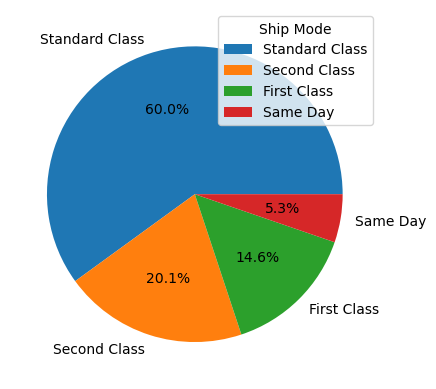

In [28]:
plt.pie(count_ship_mode["Ship Mode"],autopct = '%.1f%%',labels=count_ship_mode.index ); 
plt.legend(title = "Ship Mode")
plt.show()

#### Finding the highest value market

In [209]:
count_market = data["Market"].value_counts()
count_market

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64

In [194]:
count_market = count_market.to_frame()
count_market.index

CategoricalIndex(['APAC', 'LATAM', 'EU', 'US', 'EMEA', 'Africa', 'Canada'], categories=['APAC', 'Africa', 'Canada', 'EMEA', 'EU', 'LATAM', 'US'], ordered=False, dtype='category')

In [197]:
count_market = data["Market"].value_counts()
count_market = count_market.sort_values(ascending=False)

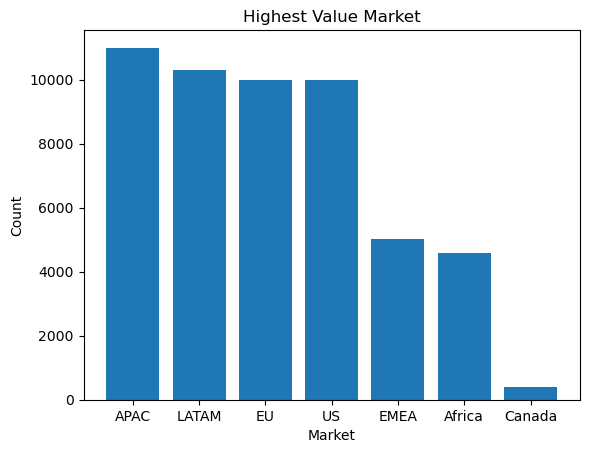

In [210]:
plt.bar(count_market.index, count_market.values)
plt.xlabel("Market")
plt.ylabel("Count")
plt.title("Highest Value Market")
plt.show()

#### Knowing the Item Purchase Frequency

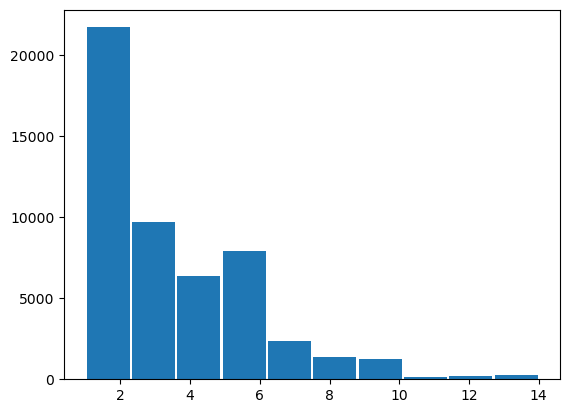

In [32]:
plt.hist(data["Quantity"],rwidth = 0.95)
plt.show()

#### Finding the total quantity in category

In [33]:
count_quantity_category = dataframe.groupby("Category")["Quantity"].sum()
count_quantity_category = count_quantity_category.sort_values(ascending=False)

In [34]:
count_quantity_category = count_quantity_category.to_frame()
count_quantity_category

,Quantity
Category,
Office Supplies,108182
Technology,35176
Furniture,34954


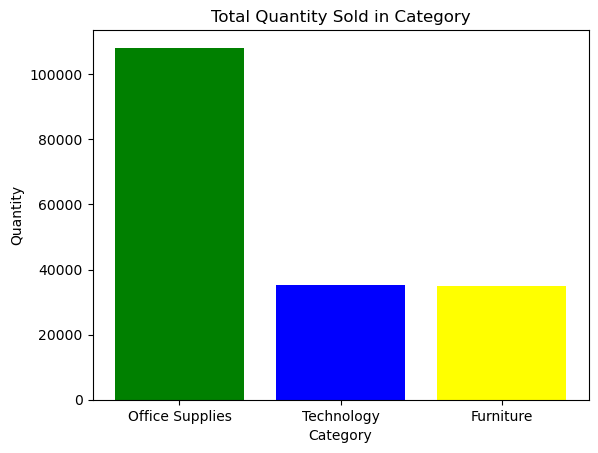

In [35]:
plt.bar(count_quantity_category.index, count_quantity_category["Quantity"], color = ["green", "blue", "yellow"])
plt.title("Total Quantity Sold in Category")
plt.xlabel("Category")
plt.ylabel("Quantity")
plt.show()

#### Finding the profit made in each category

In [36]:
total_profit_category = dataframe.groupby("Category")["Profit"].sum()
total_profit_category = total_profit_category.sort_values(ascending=False)

In [37]:
total_profit_category = total_profit_category.to_frame()
total_profit_category

,Profit
Category,
Technology,663778.73318
Office Supplies,518473.83430
Furniture,285204.72380


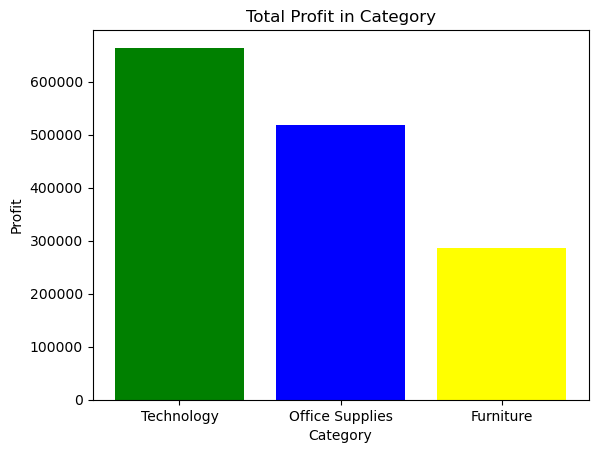

In [38]:
plt.bar(total_profit_category.index, total_profit_category["Profit"], color = ["green", "blue", "yellow"])
plt.title("Total Profit in Category")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.show()

#### Finding total quantity purchased in each segment

In [39]:
count_quantity_segment = dataframe.groupby("Segment")["Quantity"].sum()
count_quantity_segment

Segment
Consumer       92157
Corporate      53565
Home Office    32590
Name: Quantity, dtype: int64

In [40]:
count_quantity_segment = count_quantity_segment.to_frame()
count_quantity_segment

,Quantity
Segment,
Consumer,92157
Corporate,53565
Home Office,32590


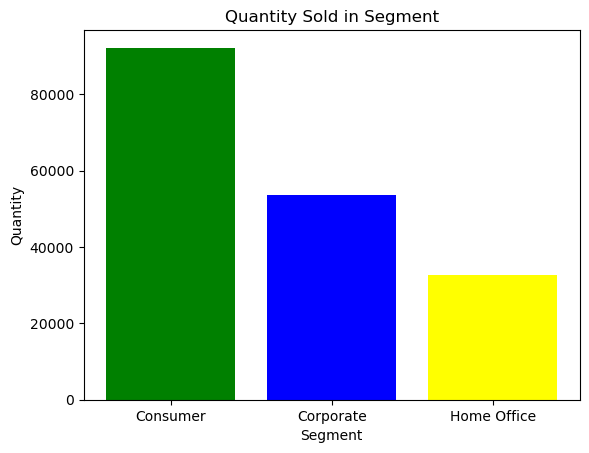

In [41]:
plt.bar(count_quantity_segment.index, count_quantity_segment["Quantity"], color = ["green", "blue", "yellow"])
plt.title("Quantity Sold in Segment")
plt.xlabel("Segment")
plt.ylabel("Quantity")
plt.show()

#### Finding profit made in segment

In [42]:
total_profit_segment = dataframe.groupby("Segment")["Profit"].sum()
total_profit_segment

Segment
Consumer       749239.78206
Corporate      441208.32866
Home Office    277009.18056
Name: Profit, dtype: float64

In [43]:
total_profit_segment = total_profit_segment.to_frame()
total_profit_segment

,Profit
Segment,
Consumer,749239.78206
Corporate,441208.32866
Home Office,277009.18056


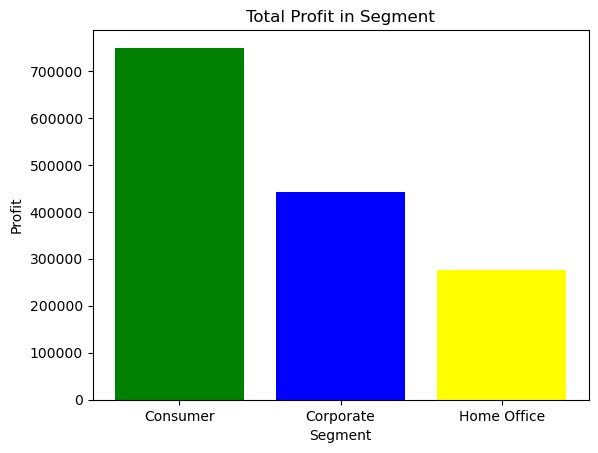

In [44]:
plt.bar(total_profit_segment.index, total_profit_segment["Profit"], color = ["green", "blue", "yellow"])
plt.title("Total Profit in Segment")
plt.xlabel("Segment")
plt.ylabel("Profit")
plt.show()

In [45]:
top_region = dataframe.groupby('Region')['Sales'].sum().sort_values(ascending=False)
top_region = top_region.reset_index()

In [46]:
dataframe.groupby(by='Region').sum()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Region,,,,,,,
Africa,212025742,0.0,7.837732e+05,10564,718.800,88871.63100,88139.47
Canada,17851051,0.0,6.692817e+04,833,0.000,17817.39000,7405.63
Caribbean,8245229,0.0,3.242809e+05,6299,229.420,34571.32104,35590.15
Central,188461053,151786150.0,2.822303e+06,41762,1543.610,311403.98164,296940.56
Central Asia,52105538,0.0,7.528266e+05,7715,138.200,132480.18700,77830.15
EMEA,233028207,0.0,8.061613e+05,11517,986.100,43897.97100,88375.73
East,103204927,50171698.0,6.787812e+05,10618,414.000,91522.78000,72743.62
North,46356390,0.0,1.248166e+06,18021,459.630,194597.95252,131474.09
North Asia,58875575,0.0,8.483098e+05,8851,113.900,165578.42100,95030.61


#### Finding sales made by each shipping mode

In [105]:
total_sales_ship_mode = dataframe.groupby("Ship Mode")["Sales"].sum()
total_sales_ship_mode = total_sales_ship_mode.sort_values(ascending=True)

In [94]:
total_sales_ship_mode = total_sales_ship_mode.to_frame()
total_sales_ship_mode

,Sales
Ship Mode,
Same Day,6.672020e+05
First Class,1.830976e+06
Second Class,2.565672e+06
Standard Class,7.578652e+06


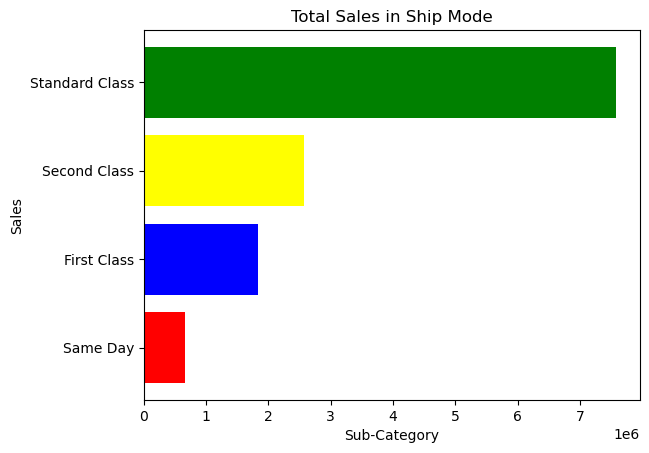

In [96]:
plt.barh(total_sales_ship_mode.index, total_sales_ship_mode["Sales"], color = ["red", "blue", "yellow", "green"])
plt.title("Total Sales in Ship Mode")
plt.xlabel("Sub-Category")
plt.ylabel("Sales")
plt.show()

#### Finding profit made by each shipping mode

In [79]:
total_profit_ship_mode = dataframe.groupby("Ship Mode")["Profit"].sum()
total_profit_ship_mode = total_profit_ship_mode.sort_values(ascending=True)

In [80]:
total_profit_ship_mode = total_profit_ship_mode.to_frame()
total_profit_ship_mode

,Profit
Ship Mode,
Same Day,76173.06780
First Class,208104.67520
Second Class,292583.52708
Standard Class,890596.02120


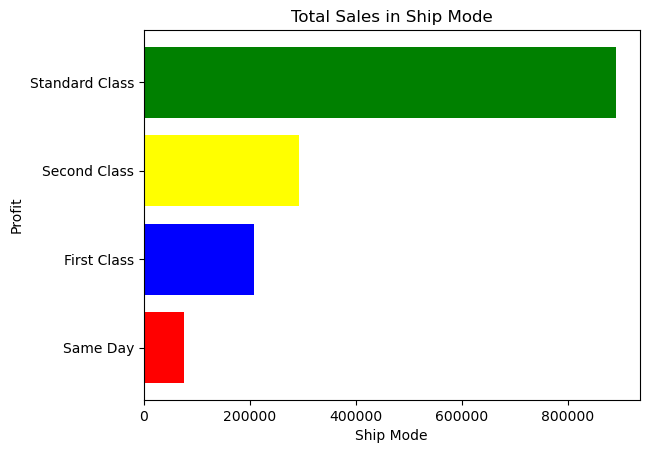

In [83]:
plt.barh(total_profit_ship_mode.index, total_profit_ship_mode["Profit"], color = ["red", "blue", "yellow", "green"])
plt.title("Total Sales in Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Profit")
plt.show()

#### Finding units sold in each sub-category

In [53]:
count_quantity_sub_category = dataframe.groupby("Sub-Category")["Quantity"].sum()
count_quantity_sub_category = count_quantity_sub_category.sort_values(ascending=False)

In [54]:
count_quantity_sub_category = count_quantity_sub_category.to_frame()
count_quantity_sub_category

,Quantity
Sub-Category,
Binders,21429
Storage,16917
Art,16301
Paper,12822
Chairs,12336
Phones,11870
Furnishings,11225
Accessories,10946
Labels,9322


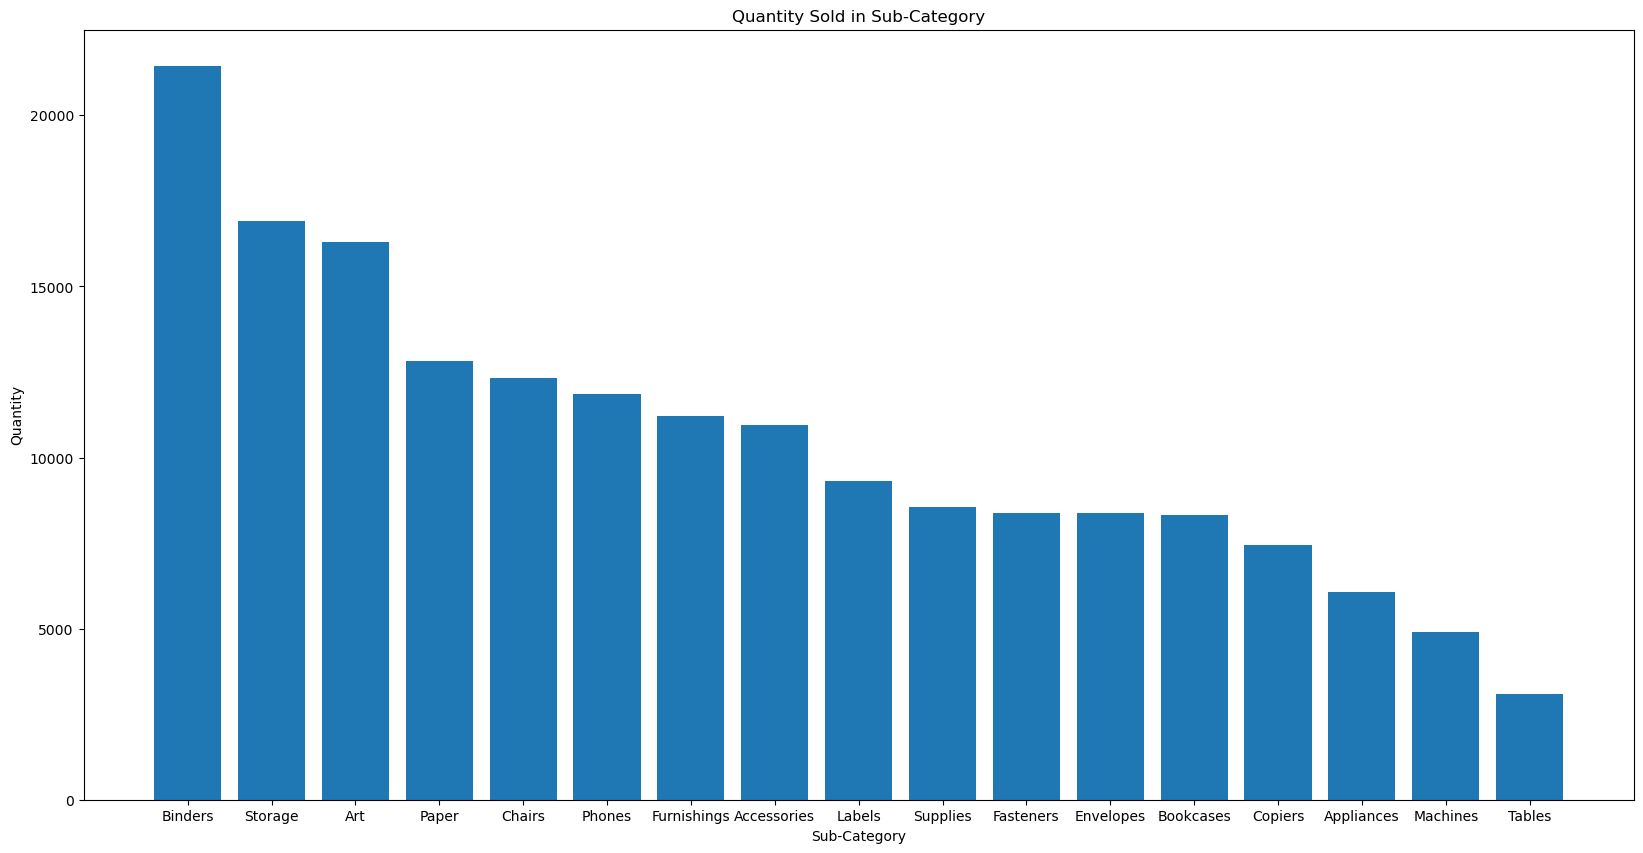

In [85]:
plt.figure(figsize=(20, 10))
plt.bar(count_quantity_sub_category.index, count_quantity_sub_category["Quantity"])
plt.title("Quantity Sold in Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Quantity")
plt.show()

#### Finding sales made in each sub-category

In [56]:
total_sales_sub_category = dataframe.groupby("Sub-Category")["Sales"].sum()
total_sales_sub_category = total_sales_sub_category.sort_values(ascending=False)

In [57]:
total_sales_sub_category = total_sales_sub_category.to_frame()
total_sales_sub_category

,Sales
Sub-Category,
Phones,1.706824e+06
Copiers,1.509436e+06
Chairs,1.501682e+06
Bookcases,1.466572e+06
Storage,1.127086e+06
Appliances,1.011064e+06
Machines,7.790601e+05
Tables,7.570419e+05
Accessories,7.492370e+05


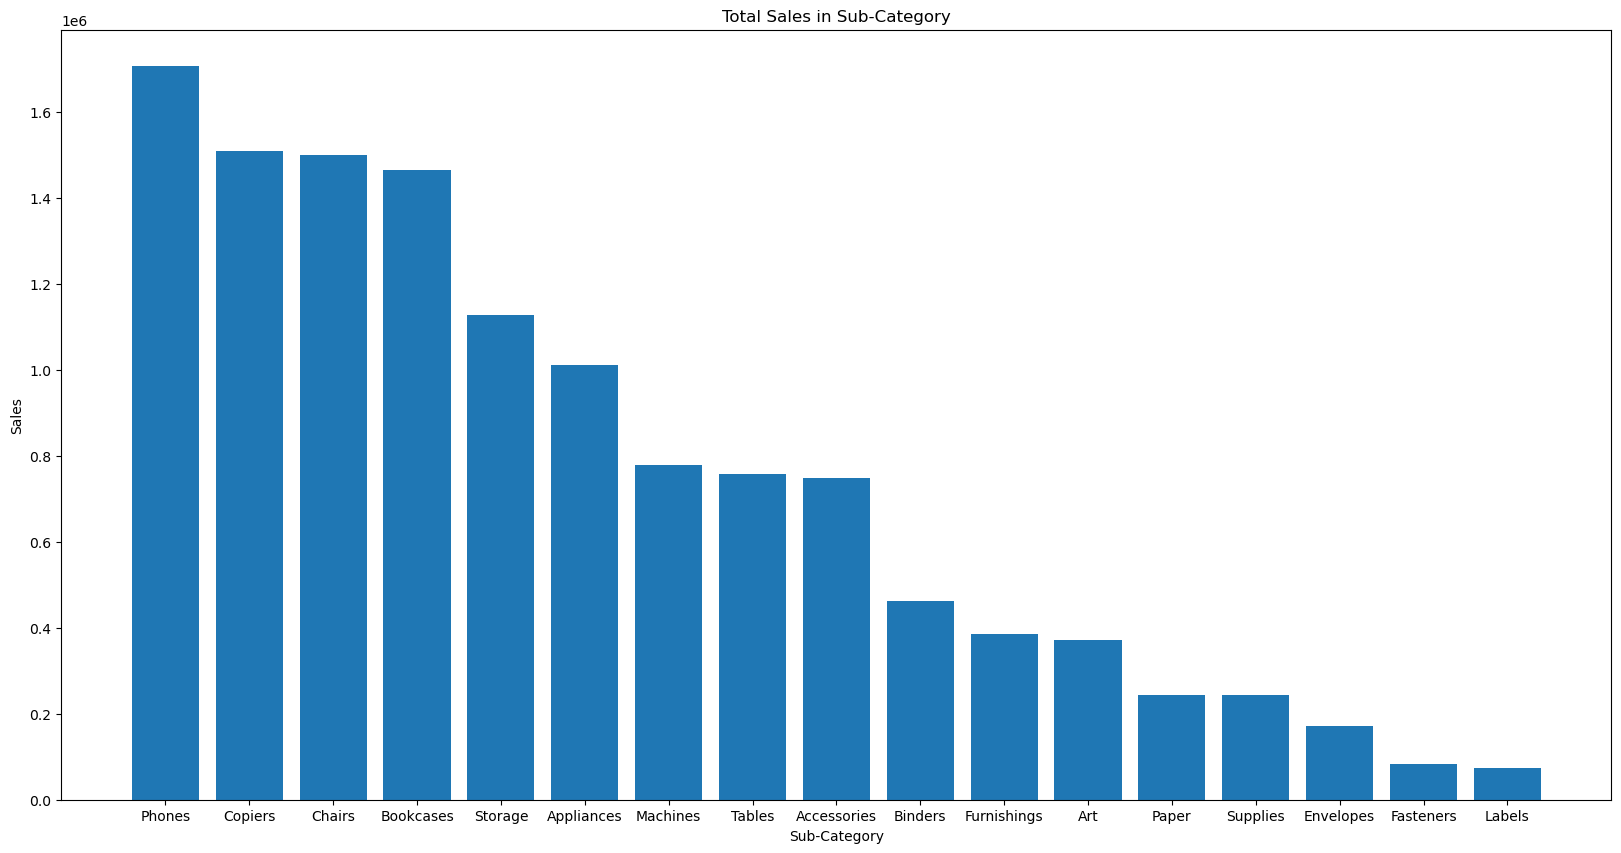

In [58]:
plt.figure(figsize=(20, 10))
plt.bar(total_sales_sub_category.index, total_sales_sub_category["Sales"])
plt.title("Total Sales in Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Sales")
plt.show()

#### Finding total units sold in region

In [59]:
count_quantity_region = dataframe.groupby("Region")["Quantity"].sum()
count_quantity_region = count_quantity_region.sort_values(ascending=False)

In [60]:
count_quantity_region = count_quantity_region.to_frame()
count_quantity_region

,Quantity
Region,
Central,41762
South,25206
North,18021
Oceania,12838
West,12266
Southeast Asia,11822
EMEA,11517
East,10618
Africa,10564


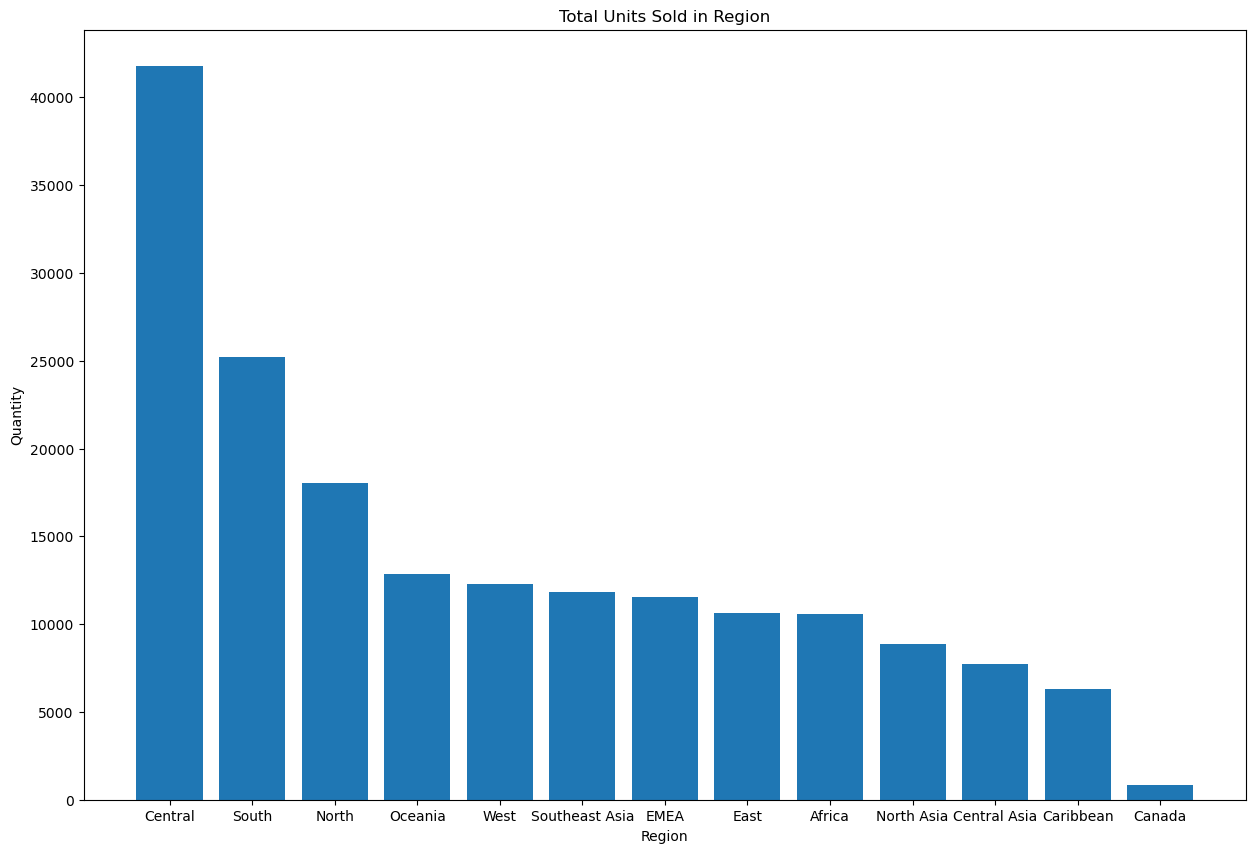

In [61]:
plt.figure(figsize=(15, 10))
plt.bar(count_quantity_region.index, count_quantity_region["Quantity"])
plt.title("Total Units Sold in Region")
plt.xlabel("Region")
plt.ylabel("Quantity")
plt.show()

#### Finding total sales made in a region

In [62]:
total_sales_region = dataframe.groupby("Region")["Sales"].sum()
total_sales_region = total_sales_region.sort_values(ascending=False)

In [63]:
total_sales_region = total_sales_region.to_frame()
total_sales_region

,Sales
Region,
Central,2.822303e+06
South,1.600907e+06
North,1.248166e+06
Oceania,1.100185e+06
Southeast Asia,8.844232e+05
North Asia,8.483098e+05
EMEA,8.061613e+05
Africa,7.837732e+05
Central Asia,7.528266e+05


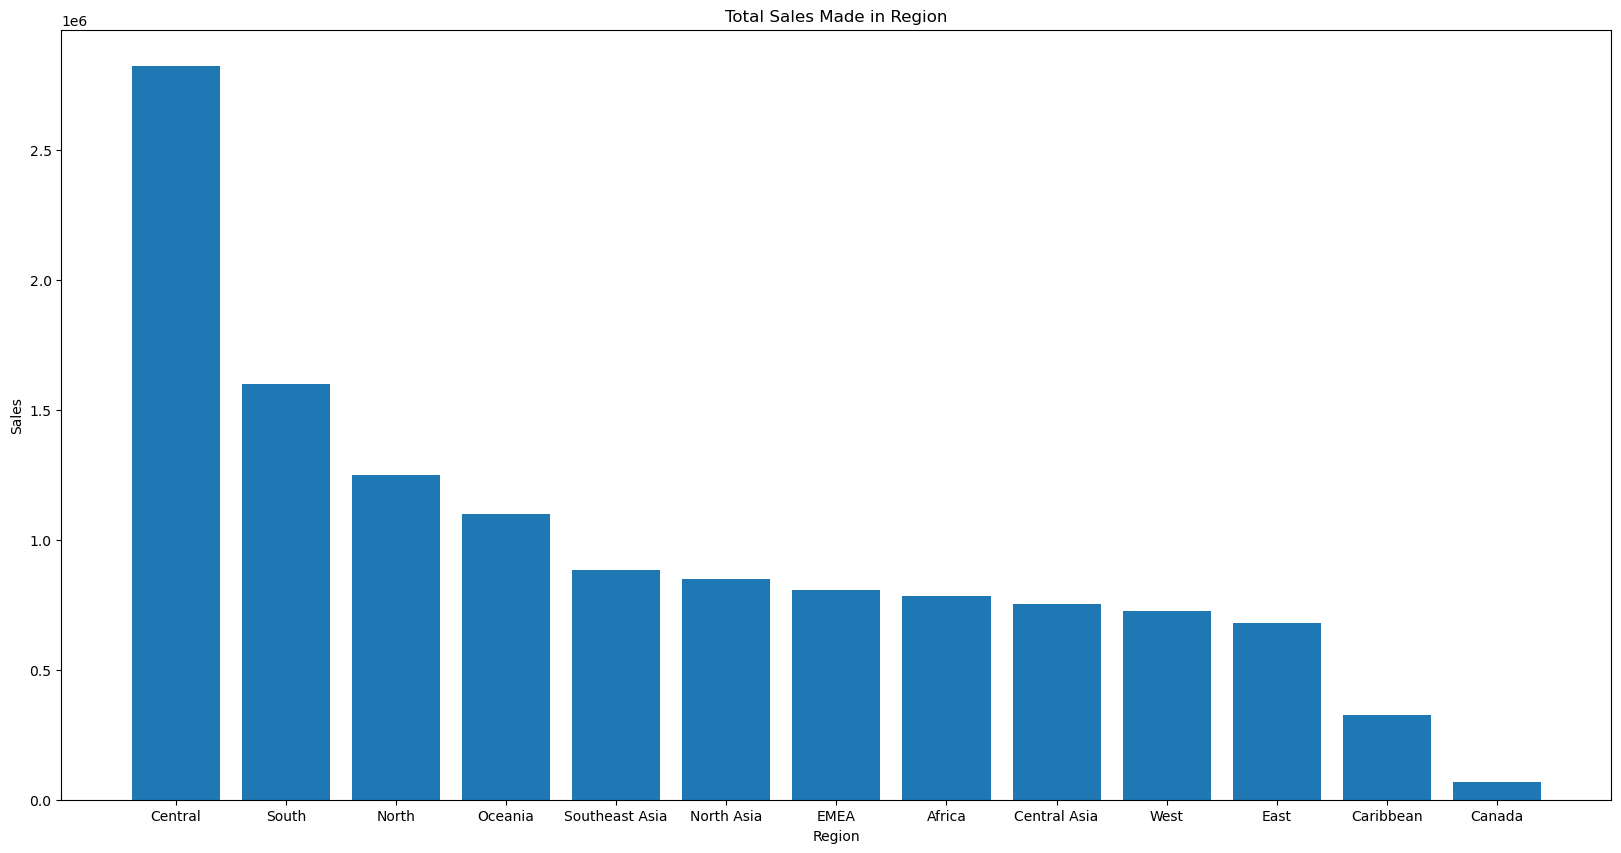

In [64]:
plt.figure(figsize=(20, 10))
plt.bar(total_sales_region.index, total_sales_region["Sales"])
plt.title("Total Sales Made in Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()

#### Finding units sold by top 10 countries

In [171]:
count_quantity_country = dataframe.groupby("Country")["Quantity"].sum()
count_quantity_country = count_quantity_country.sort_values(ascending=False)
top_10_countries = count_quantity_country.head(10)

In [172]:
count_quantity_country = count_quantity_country.to_frame()
count_quantity_country

,Quantity
Country,
United States,37873
France,10804
Australia,10673
Mexico,10011
Germany,7745
...,...
South Sudan,5
Eritrea,4
Burundi,4


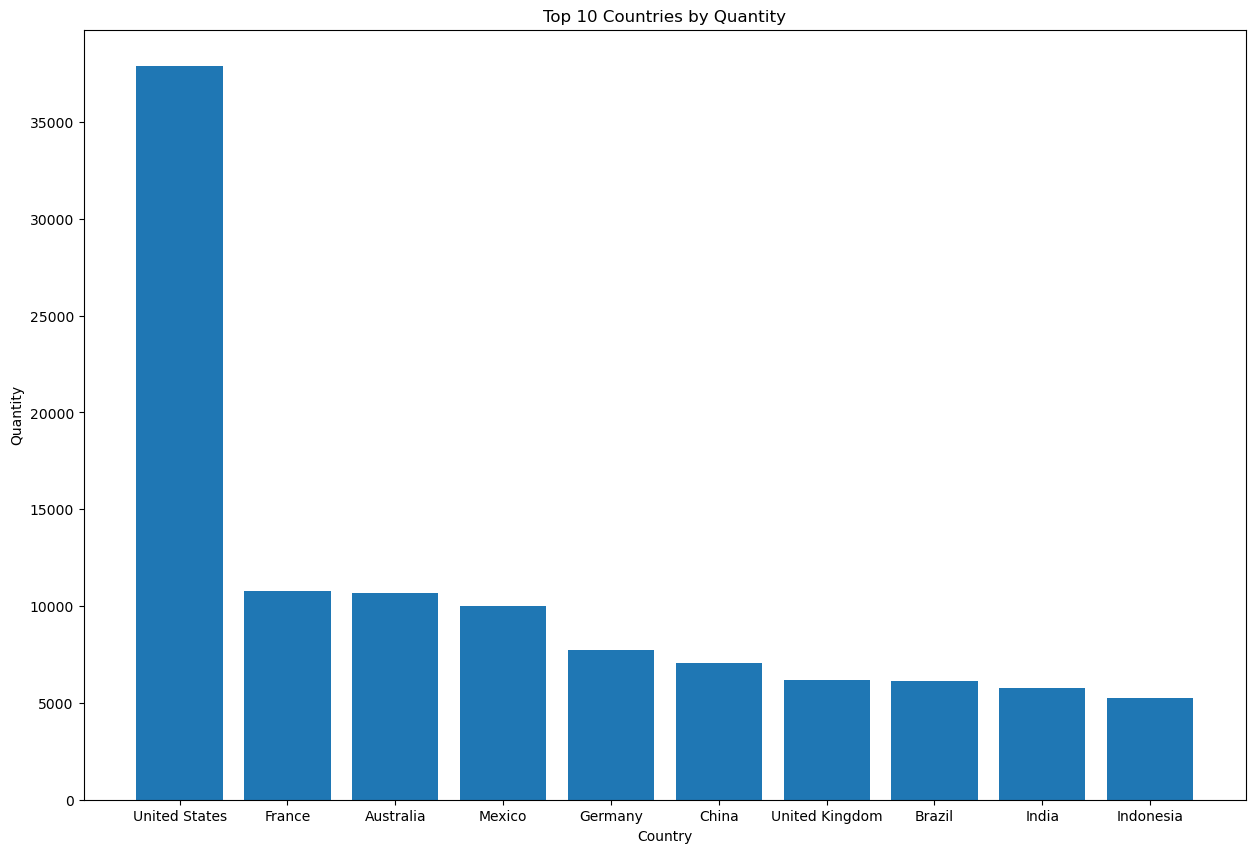

In [175]:
plt.figure(figsize = (15,10))
plt.bar(top_10_countries.index, top_10_countries.values)
plt.xlabel("Country")
plt.ylabel("Quantity")
plt.title("Top 10 Countries by Quantity")
plt.show()

#### Finding total sales made by top 10 countries

In [186]:
total_sales_country = dataframe.groupby("Country")["Sales"].sum()
total_sales_country = total_sales_country.sort_values(ascending=False)
top_10_countries_sales = total_sales_country.head(10)

In [187]:
total_sales_country = total_sales_country.to_frame()
total_sales_country

,Sales
Country,
United States,2.297201e+06
Australia,9.252359e+05
France,8.589311e+05
China,7.005620e+05
Germany,6.288400e+05
...,...
Tajikistan,2.427840e+02
Macedonia,2.096400e+02
Eritrea,1.877400e+02


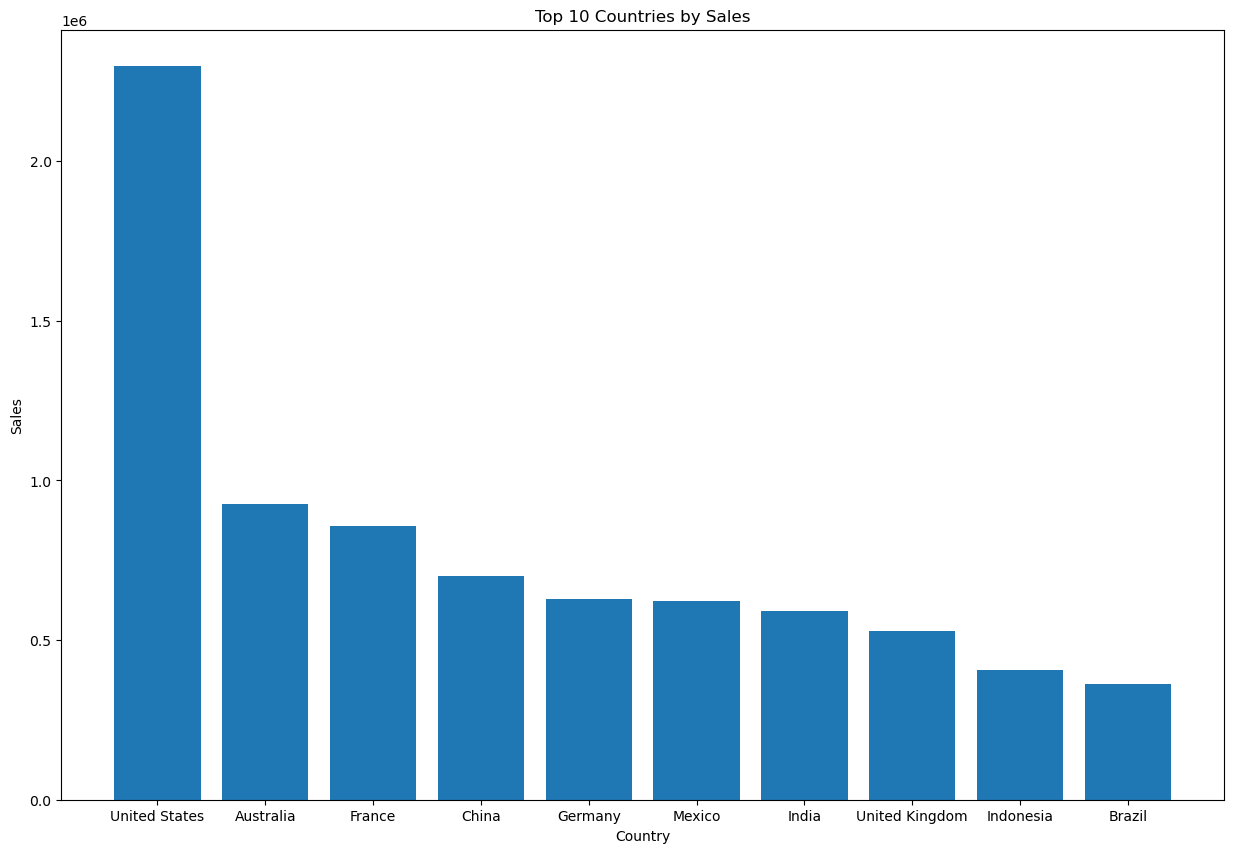

In [188]:
plt.figure(figsize = (15,10))
plt.bar(top_10_countries_sales.index, top_10_countries_sales.values)
plt.xlabel("Country")
plt.ylabel("Sales")
plt.title("Top 10 Countries by Sales")
plt.show()

#### Finding the total units sold in each market

In [71]:
count_quantity_market = dataframe.groupby("Market")["Quantity"].sum()
count_quantity_market = count_quantity_market.sort_values(ascending=False)

In [72]:
count_quantity_market = count_quantity_market.to_frame()
count_quantity_market

,Quantity
Market,
APAC,41226
LATAM,38526
US,37873
EU,37773
EMEA,11517
Africa,10564
Canada,833


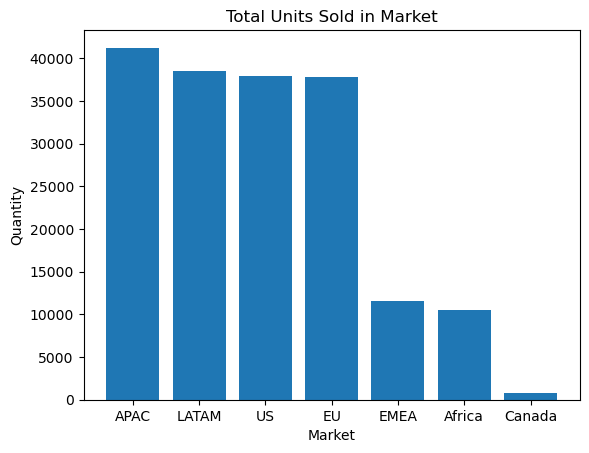

In [73]:
plt.bar(count_quantity_market.index, count_quantity_market["Quantity"])
plt.title("Total Units Sold in Market")
plt.xlabel("Market")
plt.ylabel("Quantity")
plt.show()

####  Finding the total sales made in each market

In [74]:
total_sales_market = dataframe.groupby("Market")["Sales"].sum()
total_sales_market = total_sales_market.sort_values(ascending=False)

In [75]:
total_sales_market = total_sales_market.to_frame()
total_sales_market

,Sales
Market,
APAC,3.585744e+06
EU,2.938089e+06
US,2.297201e+06
LATAM,2.164605e+06
EMEA,8.061613e+05
Africa,7.837732e+05
Canada,6.692817e+04


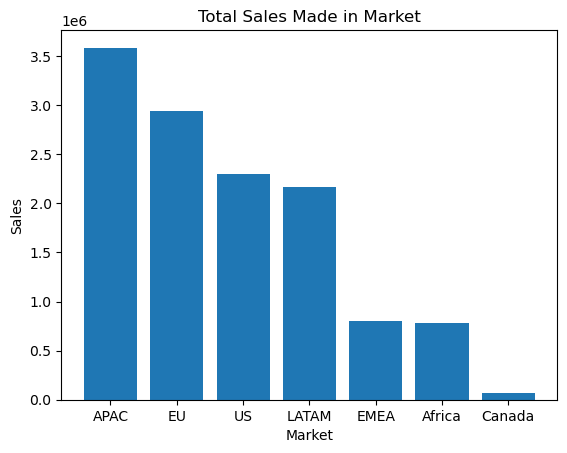

In [76]:
plt.bar(total_sales_market.index, total_sales_market["Sales"])
plt.title("Total Sales Made in Market")
plt.xlabel("Market")
plt.ylabel("Sales")
plt.show()

#### Findings and Conclusions

#### After the analysis we realised that over the period the total amount of unit sold by Superstore across all the 7 markets in the 13 regions amounted to USD 178,312.Under segmentation, Consumer product had the highest quantity of product sold followed by Corporate and Home Office. Office supplies had the highest quantity of product sold under the Category section The Central region sold highest quantity of product in the region but APAC sold the highest quantity of product in the market.Under the sub-category the most sold product was the Binders, followed by Storage and Art. 
#### A total of USD 12,642,301.91 sales was made over the period.Over the period Superstore incurred a shipping cost of USD 1,352,820.70. This cost was generated by the 5 ship mode that was made available to our customers all over the regions. Standard class shipping had the highest cost of shipping over the period followed by second class and first class and with same class being the least.
#### An amount of USD 1,467,457.29 profit was made over the period of time. This figure was made up from Consumer product followed by Corporate and Home office under the product segmentation. The high profit realization made was derived from Technology under the category from  Consumer product,  Phones had the highest profit followed by Copiers and Chairs under the sub-category.
#### The most valued market was APAC followed by LATAM and EU. United States sold the units of products and made the highest sales followed by Australia and France.

#### Recommendations

#### We will recommend the board of Superstore to invest more into more quality and trendy Phones since it generate more profit for the store. Our customers do prefer using the standard class shipping so mangement should invest more adversting promo for customers who want to use the standard class ship. Management should emback on an aggressive marketing to help increase the sales from Canada and improve the sales from Lables. We would like to recommend that management continue to do the good work to maintain and improve products that are sold the most and put in different advertising strategies to improve the low performing products in the different sectors.

#### Saving to a csv

In [77]:
data.to_csv("Sales_Project_Cleaned.csv")

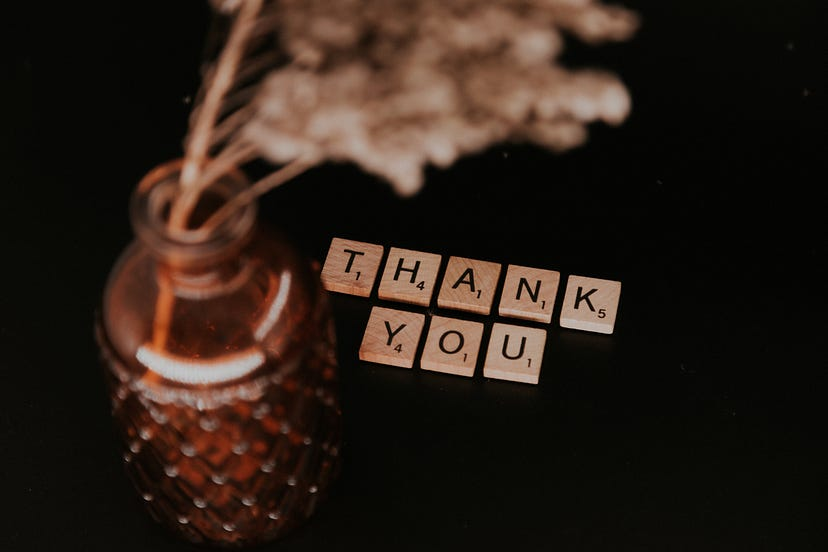